In [1]:
import pandas as pd
import os
import glob
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [2]:
def call_all_csv(filename):
       df = pd.read_csv(filename)
       df = df.drop([ 'frame','timestamp','confidence', 'face_id', 'success','AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c',
              'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c',
              'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c'], axis = 1)
       return df

In [3]:
tempat_dimana_file_berada = "/Users/mdaffarudiyanto/Downloads/data"
filenames = glob.glob(os.path.join(tempat_dimana_file_berada, "*.csv"))
dataframes = [call_all_csv(df) for df in filenames]

df = pd.concat(dataframes)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20156 entries, 0 to 8708
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AU01_r  20156 non-null  float64
 1   AU02_r  20156 non-null  float64
 2   AU04_r  20156 non-null  float64
 3   AU05_r  20156 non-null  float64
 4   AU06_r  20156 non-null  float64
 5   AU07_r  20156 non-null  float64
 6   AU09_r  20156 non-null  float64
 7   AU10_r  20156 non-null  float64
 8   AU12_r  20156 non-null  float64
 9   AU14_r  20156 non-null  float64
 10  AU15_r  20156 non-null  float64
 11  AU17_r  20156 non-null  float64
 12  AU20_r  20156 non-null  float64
 13  AU23_r  20156 non-null  float64
 14  AU25_r  20156 non-null  float64
 15  AU26_r  20156 non-null  float64
 16  AU45_r  20156 non-null  float64
dtypes: float64(17)
memory usage: 2.8 MB


In [4]:
kmo_all,kmo_model=calculate_kmo(df)

print(kmo_model)


0.6403988099946055


/Users/mdaffarudiyanto/Downloads/data/.venv/lib/python3.12/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(



Eigenvalues:
Factor 1: 4.0708
Factor 2: 2.3437
Factor 3: 1.9812
Factor 4: 1.3825
Factor 5: 1.3267
Factor 6: 0.9747
Factor 7: 0.9430
Factor 8: 0.7625
Factor 9: 0.6905
Factor 10: 0.5675
Factor 11: 0.4719
Factor 12: 0.3744
Factor 13: 0.3379
Factor 14: 0.2964
Factor 15: 0.2264
Factor 16: 0.1561
Factor 17: 0.0937

Factor Loadings:
        Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  Factor 7  \
AU01_r -0.067945  0.841552 -0.184945 -0.157081 -0.006315 -0.027361  0.218227   
AU02_r  0.025640  0.898817 -0.231477 -0.058267  0.065204  0.006425  0.076225   
AU04_r  0.369990 -0.108537 -0.184261  0.629493  0.115317 -0.212538 -0.121580   
AU05_r  0.015626  0.643820  0.317454 -0.056191  0.155473 -0.110035 -0.423463   
AU06_r  0.797011 -0.335537  0.088092 -0.244301  0.137684  0.051811 -0.012290   
AU07_r  0.677496 -0.071188 -0.252372  0.284938 -0.099618  0.269151 -0.158478   
AU09_r  0.325390 -0.004198  0.368975  0.117848  0.712842 -0.009301 -0.328198   
AU10_r  0.737584  0.195583 -0.0

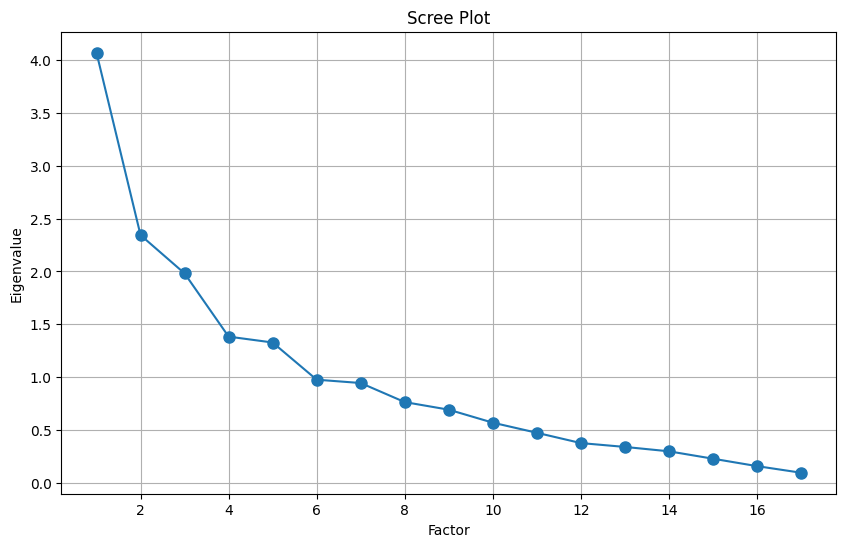

In [5]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform factor analysis
fa = FactorAnalyzer(rotation=None, method='principal', n_factors=df.shape[1])
fa.fit(scaled_data)

# Get eigenvalues and eigenvectors (factor loadings)
eigenvalues, _ = fa.get_eigenvalues()
print("\nEigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Factor {i+1}: {eigenvalue:.4f}")

# Get factor loadings
loadings = fa.loadings_

# Create a DataFrame for loadings
factor_names = [f"Factor {i+1}" for i in range(len(eigenvalues))]
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=factor_names)

# Print factor loadings
print("\nFactor Loadings:")
print(loadings_df)

# Optionally, set a threshold to identify significant loadings
threshold = 0.3

# Display variables that contribute significantly to each factor
for i in range(len(eigenvalues)):
    print(f"\nVariables significantly loaded on Factor {i+1} (Eigenvalue: {eigenvalues[i]:.2f}):")
    factor_loadings = loadings_df[f"Factor {i+1}"]
    significant_loadings = factor_loadings[abs(factor_loadings) > threshold]
    print(significant_loadings)

# Plotting the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-', markersize=8)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [7]:
n_factor = sum(eigenvalues > 1)
print("N Factor: ", n_factor)

N Factor:  5


In [8]:
fa = FactorAnalyzer(n_factors=n_factor, rotation="varimax", method="principal")
fa.fit(scaled_data)

factor_loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns = [f"Factor{i+1}" for i in range(n_factor)])

print("Factor Loadings: ", factor_loadings)

Factor Loadings:           Factor1   Factor2   Factor3   Factor4   Factor5
AU01_r  0.017007  0.862811 -0.065865 -0.096958 -0.115214
AU02_r  0.142949  0.911566 -0.096377 -0.093998 -0.015691
AU04_r  0.633457 -0.194040 -0.045504 -0.139001  0.363144
AU05_r -0.120560  0.628769  0.281757  0.066946  0.221587
AU06_r  0.340249 -0.272977  0.020972  0.800121  0.057373
AU07_r  0.747651 -0.109456 -0.023684  0.216751  0.019226
AU09_r -0.013581  0.017185  0.046344  0.408317  0.771181
AU10_r  0.607334  0.174748  0.124259  0.405720  0.152502
AU12_r  0.262631  0.127349  0.081388  0.799995 -0.074577
AU14_r -0.077608 -0.184836  0.280986  0.632237 -0.014175
AU15_r -0.159272  0.263316  0.559415  0.182362  0.306148
AU17_r  0.045498 -0.097814  0.835817 -0.016254  0.081860
AU20_r  0.079078  0.016013  0.060398 -0.292155  0.632228
AU23_r  0.442063  0.077170  0.668552  0.253345 -0.206208
AU25_r  0.585584  0.082322 -0.285477  0.498513 -0.098817
AU26_r  0.792587  0.156310  0.127684  0.090079 -0.163132
AU45_r  0.281

In [9]:
assignments = factor_loadings.idxmax(axis=1)
print("Assignments:\n")
print(assignments)

Assignments:

AU01_r    Factor2
AU02_r    Factor2
AU04_r    Factor1
AU05_r    Factor2
AU06_r    Factor4
AU07_r    Factor1
AU09_r    Factor5
AU10_r    Factor1
AU12_r    Factor4
AU14_r    Factor4
AU15_r    Factor3
AU17_r    Factor3
AU20_r    Factor5
AU23_r    Factor3
AU25_r    Factor1
AU26_r    Factor1
AU45_r    Factor4
dtype: object


In [10]:
grouped_factors = {
    factor: list(assignments[assignments == factor].index)
    for factor in assignments.unique()
}
print("\nGrouped Factors:")
print(grouped_factors)


Grouped Factors:
{'Factor2': ['AU01_r', 'AU02_r', 'AU05_r'], 'Factor1': ['AU04_r', 'AU07_r', 'AU10_r', 'AU25_r', 'AU26_r'], 'Factor4': ['AU06_r', 'AU12_r', 'AU14_r', 'AU45_r'], 'Factor5': ['AU09_r', 'AU20_r'], 'Factor3': ['AU15_r', 'AU17_r', 'AU23_r']}
